In [1]:
from samgeo.text_sam import LangSAM

In [2]:
# caminhos e arquivos

caminho_imagem = 'D:\\drone_img_sam\\praia_brava_16-12-2023\\101MEDIA\\'
arquivo_entrada = 'DJI_0001.JPG'
arquivo_saida = caminho_imagem+arquivo_entrada+'mascara'+'.tif'
image = caminho_imagem + arquivo_entrada

In [3]:
# escolha do modelo
# vit_l, vit_b, vit_h

sam = LangSAM(model_type='vit_h')

final text_encoder_type: bert-base-uncased


In [4]:
# parametros

text_prompt = "people"

box_t = 0.22

text_t = 0.22

In [5]:
# criar mascara

mascaras = sam.predict(image=image,
                       text_prompt=text_prompt,
                       box_threshold=box_t,
                       text_threshold=text_t,
                       output=arquivo_saida)

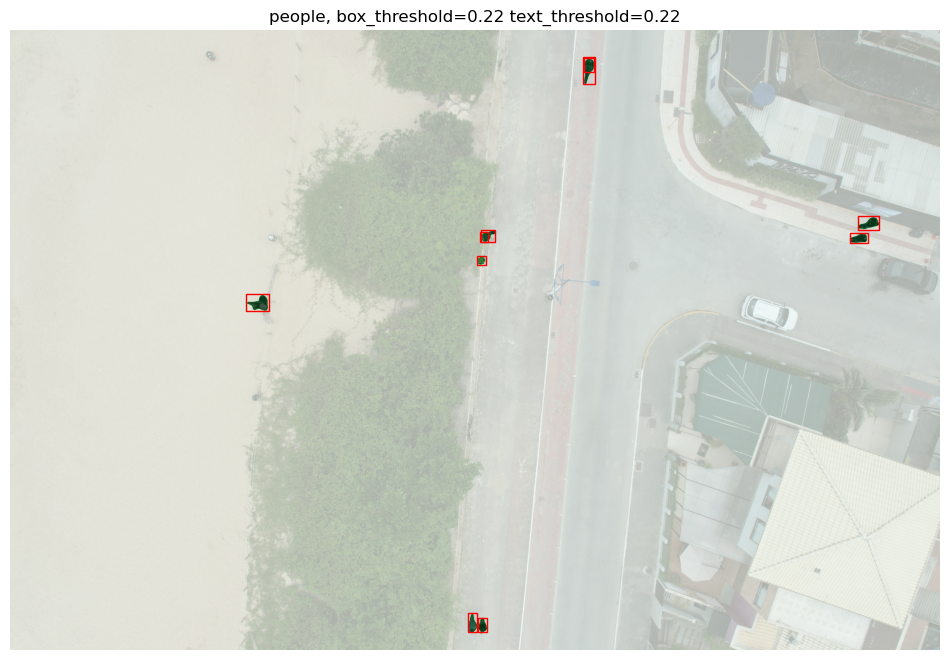

In [6]:
# mostrar imagem

anns_saida = caminho_imagem+arquivo_entrada[:-4]+'_'+str(text_prompt)+str(box_t)+'_'+str(text_t)+'.png'

sam.show_anns(
    cmap='Greens',
    box_color='red',
    title=f'{text_prompt}, box_threshold={box_t} text_threshold={text_t}',
    alpha=0.7,
    output=anns_saida
)

In [7]:
# exportar a máscara para um shapefile

shapefile_saida = caminho_imagem+arquivo_entrada[:-4]+'_'+text_prompt+'.shp'
boxes_saida = caminho_imagem+arquivo_entrada[:-4]+'_'+text_prompt+'_boxes.shp'

sam.raster_to_vector(arquivo_saida, shapefile_saida)
LangSAM.save_boxes(sam, boxes_saida)